In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Corona_NLP.csv', encoding = 'latin-1')
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [5]:
df.shape

(41157, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [7]:
df['Location'].value_counts(ascending = False)

London                          540
United States                   528
London, England                 520
New York, NY                    395
Washington, DC                  373
                               ... 
Staffordshire Moorlands           1
Kithchener ON                     1
Tulsa, Ok                         1
Watford, South Oxhey, Bushey      1
i love you so much || he/him      1
Name: Location, Length: 12220, dtype: int64

In [8]:
df['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

<Axes: title={'center': 'Count of Sentiment'}, xlabel='Sentiment'>

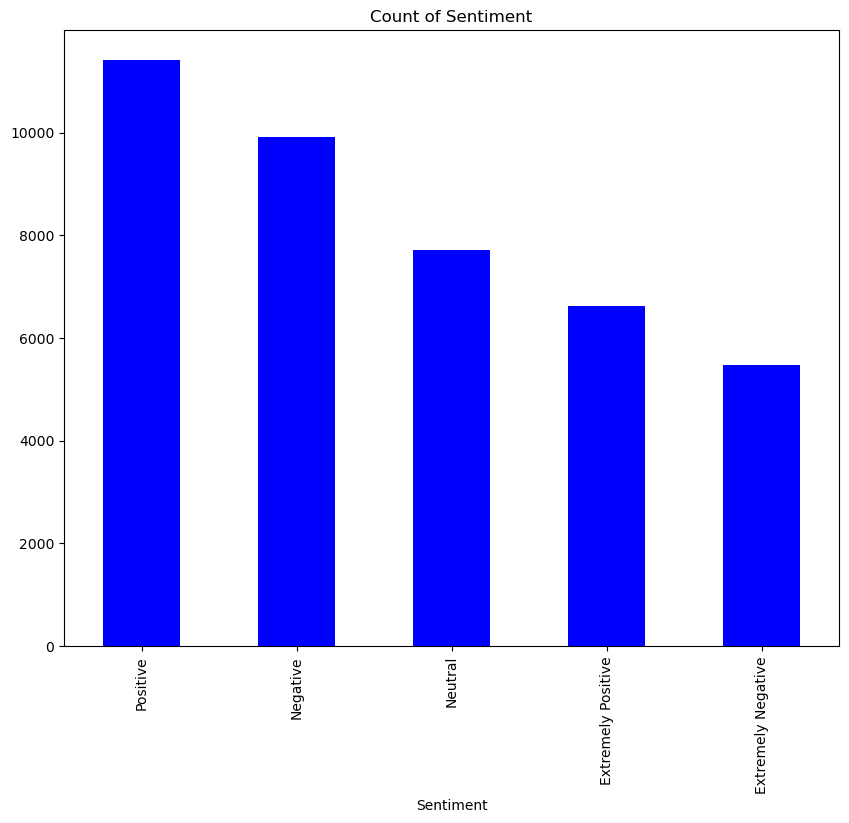

In [12]:
df['Sentiment'].value_counts().plot(kind = 'bar', title = "Count of Sentiment", figsize = (10, 8), color = 'Blue', xlabel = 'Sentiment')

<Axes: xlabel='count', ylabel='Sentiment'>

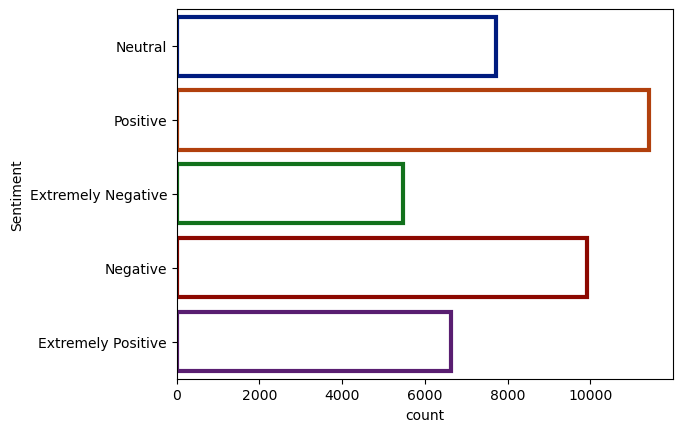

In [32]:
sns.countplot(data = df, y = df['Sentiment'], facecolor = (1, 1, 1, 1), linewidth = 3, edgecolor = sns.color_palette('dark', 5))

In [36]:
df.drop(df.columns[[0,1,2,3]], axis = 1, inplace = True)

In [37]:
df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [38]:
df.isna().sum()

OriginalTweet    0
Sentiment        0
dtype: int64

In [39]:
df.duplicated().sum()

0

In [43]:
# Loop to detect empty strings
Empty_row = []
for index in df['OriginalTweet']:
    if index.isspace() == True:
        Empty_row.append(index)

In [44]:
Empty_row

[]

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X = df['OriginalTweet']
Y = df['Sentiment']

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [50]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
text_clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [52]:
text_clf.fit(X_train, Y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
preds = text_clf.predict(X_test)

In [54]:
accuracy_score(Y_test, preds)

0.5630061548428895

In [56]:
confusion_matrix(Y_test, preds)

array([[1047,   16,  458,   46,   73],
       [  13, 1339,   52,   33,  564],
       [ 558,   83, 1397,  389,  548],
       [  47,   35,  303, 1495,  423],
       [  88,  685,  522,  460, 1674]], dtype=int64)

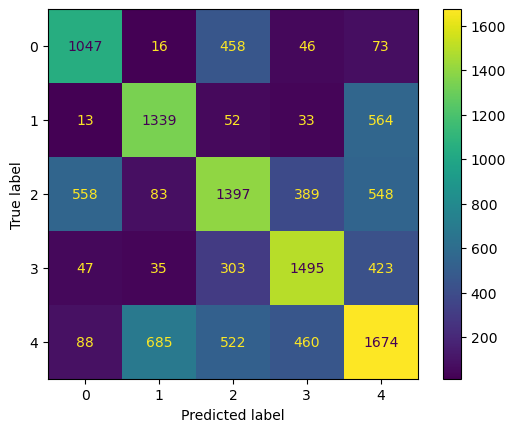

In [59]:
ConfusionMatrixDisplay(confusion_matrix(Y_test, preds)).plot()

In [60]:
# Creating new tweets to check the prediction

In [68]:
posTweet = [('I am really happy with the work situation during covid. I hope we continue to work remotely after this pandemic.')]
negTweet = [('This entire workplace has been extremely disappointing during the pandemic. I hate giong to office and having to follow so many checks')]

In [65]:
posPred = text_clf.predict(posTweet)
print(posPred)

['Extremely Positive']


In [66]:
negPred = text_clf.predict(negTweet)
print(negPred)

['Extremely Negative']
